In [1]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid]

    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
     
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    result = result.sort_values(by = 'week_number')
    
    return result.prediction.iloc[-1].round()

In [2]:
predict_claims('0392ee82d61e6b95e117d22d8f732b12',39)

NameError: name 'unemployment_data' is not defined

In [3]:
get_ipython().run_line_magic('pip', 'install db-dtypes')

Note: you may need to restart the kernel to use updated packages.


In [4]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n\n#- IRONHACKS RESEARCH TRACKING CODE\n#----------------------------------\n# The following code is used to help our research team understand how you \n# our notebook environment. We do not collect any personal information with\n# the following code, it is used to measure when and how often you work on\n# your submission files.\n\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\n\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")

In [5]:
import db_dtypes
import matplotlib.pyplot as plt
import os
import pandas as pd
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import seaborn as sns

In [6]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [7]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [8]:
query_job = bigquery_client.query(query)
unemployment_data = query_job.to_dataframe()

In [9]:
unemployment_data = unemployment_data.drop_duplicates().fillna(0, inplace=True)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4662/789623303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_data = unemployment_data.drop_duplicates().fillna(0, inplace=True)


In [10]:
unemployment_data

In [11]:
unemployment_data = unemployment_data

In [12]:
sns.heatmap(unemployment_data.fillna(0).corr(), annot = True)
plt.show()

AttributeError: 'NoneType' object has no attribute 'fillna'

In [13]:
unemployment_data = unemployment_data.drop_duplicates()
unemployment_data.fillna(0, inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop_duplicates'

In [14]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [15]:
query_job = bigquery_client.query(query)
unemployment_data = query_job.to_dataframe()

In [16]:
unemployment_data = unemployment_data.drop_duplicates()
unemployment_data.fillna(0, inplace=True)

In [17]:
unemployment_data

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,0,14,...,0,0,0,0,0,11,0,0,0,0
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,0,108,...,76,35,0,0,0,0,0,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,0,0,...,0,0,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,0,0,...,0,0,0,0,0,10,0,0,0,0
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,0,69,...,90,65,0,0,0,135,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16827,6d4dc6590c52c9b265d5003bf90ddbbb,20220423,17,18063,210607,"Census Tract 2106.07, Hendricks County, Indiana",13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16828,f35320206f3dd1ffc411e4ac127caf92,20220618,25,18163,3804,"Census Tract 38.04, Vanderburgh County, Indiana",21,0,0,0,...,0,0,0,0,0,0,0,0,0,14
16829,f35320206f3dd1ffc411e4ac127caf92,20220827,35,18163,3804,"Census Tract 38.04, Vanderburgh County, Indiana",22,0,0,13,...,0,0,0,0,0,0,0,0,0,0
16831,bbcb018f0e5e49e13636f6e78ce9f60f,20220326,13,18163,10203,"Census Tract 102.03, Vanderburgh County, Indiana",53,0,0,48,...,0,0,0,0,0,0,0,0,0,0


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4662/169158775.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(unemployment_data.fillna(0).corr(), annot = True)


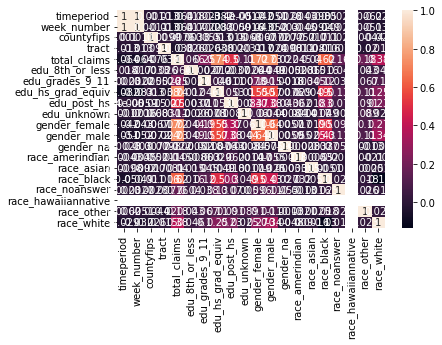

In [18]:
sns.heatmap(unemployment_data.fillna(0).corr(), annot = True)
plt.show()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4662/169158775.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(unemployment_data.fillna(0).corr(), annot = True)


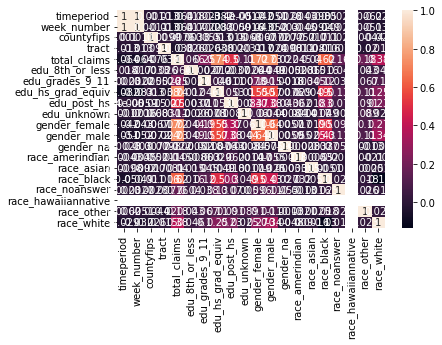

In [19]:
sns.heatmap(unemployment_data.fillna(0).corr(), annot = True)
plt.show()

In [20]:
unemployment_data.isnull().sum()

uu_id                     0
timeperiod                0
week_number               0
countyfips                0
tract                     0
tract_name                0
total_claims              0
edu_8th_or_less           0
edu_grades_9_11           0
edu_hs_grad_equiv         0
edu_post_hs               0
edu_unknown               0
top_category_employer1    0
top_category_employer2    0
top_category_employer3    0
gender_female             0
gender_male               0
gender_na                 0
race_amerindian           0
race_asian                0
race_black                0
race_noanswer             0
race_hawaiiannative       0
race_other                0
race_white                0
dtype: int64

In [21]:
unemployment_data = unemployment_data.sort_values(by=['uu_id','week_number']).reset_index()

In [22]:
unemployment_data = unemployment_data.drop('index', axis=1)

In [23]:
unemployment_data.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,001cd9ae23064d7f0fd3cd327c873d8d,20220730,31,18099,20102,"Census Tract 201.02, Marshall County, Indiana",34,0,0,30,...,0,0,0,0,0,0,0,0,0,34
1,001cd9ae23064d7f0fd3cd327c873d8d,20220813,33,18099,20102,"Census Tract 201.02, Marshall County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,001cd9ae23064d7f0fd3cd327c873d8d,20220820,34,18099,20102,"Census Tract 201.02, Marshall County, Indiana",25,0,0,0,...,0,22,0,0,0,0,0,0,0,0
3,001cd9ae23064d7f0fd3cd327c873d8d,20220827,35,18099,20102,"Census Tract 201.02, Marshall County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001cd9ae23064d7f0fd3cd327c873d8d,20220903,36,18099,20102,"Census Tract 201.02, Marshall County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
uuids = unemployment_data.uu_id.unique()

In [25]:
len(uuids)

525

In [26]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid]

    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
     
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    result = result.sort_values(by = 'week_number')
    
    return result.prediction.iloc[-1].round()

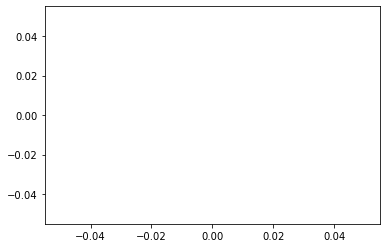

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [27]:
predict_claims('0392ee82d61e6b95e117d22d8f732b12',39)

In [28]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid]

    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
     
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    result = result.sort_values(by = 'week_number')
    
    return result.prediction.iloc[-1].round()

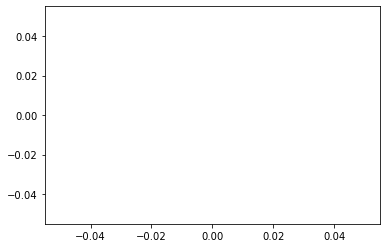

ValueError: With n_samples=0, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [29]:
predict_claims('0392ee82d61e6b95e117d22d8f732b12',39)